In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.svm import SVC, LinearSVC
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
(svm_clf.coef_[0],svm_clf.intercept_[0])

(array([1.29411744, 0.82352928]), -3.7882347112962464)

In [32]:
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0,5.5,200)

def calculate_boundary(w , b):
    boundary = - w[0]/w[1] * x0 - b/w[1]
    margin = 1 / w[1]
    up = boundary + margin
    down = boundary - margin
    return boundary,up,down

decision_boundary,gutter_up,gutter_down = calculate_boundary(w,b)

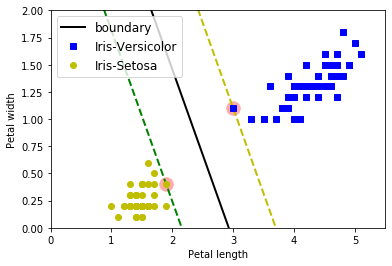

In [33]:
svs = svm_clf.support_vectors_
plt.scatter(svs[:,0],svs[:,1],s=180, facecolors="#FFAAAA")
plt.plot(x0,decision_boundary,"k-",linewidth=2,label="boundary")
plt.plot(x0,gutter_up,"y--",linewidth=2)
plt.plot(x0,gutter_down,"g--",linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.legend(loc="upper left", fontsize=12)
plt.axis([0,5.5,0,2])
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()





In [34]:
ceof = svm_clf.coef_
intercept = svm_clf.intercept_

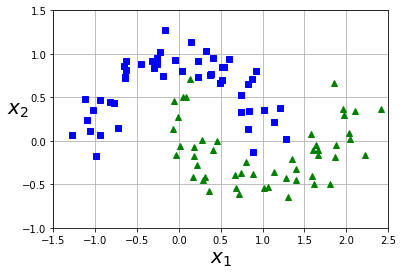

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [36]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

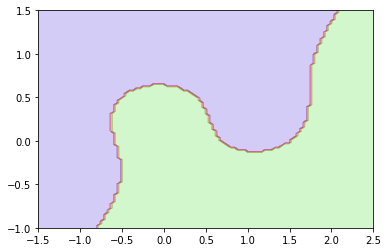

In [48]:
def plot_predictions(clf,axes):
    x0s = np.linspace(axes[0],axes[1],100)
    x1s = np.linspace(axes[2],axes[3],100)
    x0,x1= np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(),x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1,y_decision,cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plt.show()